This notebook reconstructs an image processing workflow recommended by GPT Vision 4 to better prepare a low-quality scan for OCR. The intention of this notebook is to critically evaluate AI-recommendations for image processing as opposed to earlier decisions taken by the DigiKAR team. The packages and operations below were explicitly recommended by GPT Vision 4, which reproduces the visual output that Monika Barget also received when prompting directly in the ChatGPT user interface. For the initial prompting, Monika Barget used a page from the 1740 "Staatskalender" published in the Electorate of Mainz. Instances where the script below diverts from the GPT Vision 4 recommendations are highlighted in the comments.

In [33]:
# Import packages recommended by ChatGPT

import cv2
import numpy as np
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Confirm import for users
print("Import successful!")

Import successful!


The sections defining paths below and loading the image have been specifically added for the BYOD workshop participants and are not part of the GPT 4 - Vision workflow.

In [19]:
# Define the folder path
folder_path = "/kaggle/input/mayntzbishops/"  # add your folder name

# Confirm when folder path exists
print("Folder found!")

Folder found!


In [25]:
# Show folder content
for dirname, _, filenames in os.walk(folder_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mayntzbishops/Mayntz Ersten Bischffe_Page_1.jpg


In [26]:
# Select the first image
first_image = os.path.join(dirname, filenames[0])

# Confirm selection for users
print(f"Using first found image: {first_image}")

Using first found image: /kaggle/input/mayntzbishops/Mayntz Ersten Bischffe_Page_1.jpg


In [30]:
# Load the image in grayscale (GPT-Vision-4 recommendation)
image = cv2.imread(first_image, cv2.IMREAD_GRAYSCALE) # This AI-"decision" is problematic!

# Error handling added for BYOD lab workshop
if image is None:
    raise ValueError(f"Could not load image: {first_image}")
else:
    print("Valid image loaded!")

Valid image loaded!


Enhanced image saved as: /kaggle/working/enhanced_output.jpg


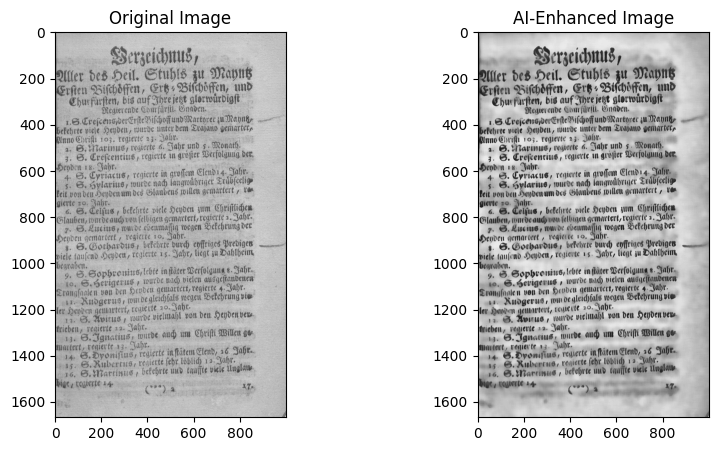

In [31]:
# Image enhancement workflow as created by GPT-Vision-4
# users are welcome to adjust the values and test alternative results

# The main library used here is OpenCV, which Monika Barget also used in her much shorter and simpler
# script for the DigiKAR project. 

# OpenCV (Open Source Computer Vision Library) is an open source computer vision and
# machine learning software library. We should discuss how many of its modules make sense for OCR image
# preparation.

# Full documentation: https://docs.opencv.org/4.x/index.html

# Step 1: Noise Reduction using Non-Local Means Denoising
denoised = cv2.fastNlMeansDenoising(image, h=30, templateWindowSize=7, searchWindowSize=21)

# Step 2: Adaptive Contrast Enhancement using CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
contrast_enhanced = clahe.apply(denoised)

# Step 3: Text-Specific Sharpening to Enhance Borders
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(contrast_enhanced, -1, kernel)

# Convert to PIL for saving and visualization
enhanced_image = Image.fromarray(sharpened)

# Save the processed image
output_path = "/kaggle/working/enhanced_output.jpg"
enhanced_image.save(output_path)
print(f"Enhanced image saved as: {output_path}")

# Display the Original vs Enhanced Image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(sharpened, cmap='gray')
plt.title("AI-Enhanced Image")

plt.show()


Original AI-prompting and code adjustments by Monika Barget, Maastricht University, in January 2025 for the Bring Your Own Data Labs workshop.